# Title: Analyzing video games sales

 
 **Information about the data used:**  
    -Data Source: Video Game Sales Dataset  
    -Location: https://www.kaggle.com/gregorut/videogamesales  
    -Filename: videogamesales.zip  

# Initial the exploration of the Dataset

In [5]:
import numpy as np 
import pandas as pd


## Importing data

In [6]:
df = pd.read_csv('vgsales.csv')

In [7]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [9]:
df.shape

(16598, 11)

In [10]:
df.columns

Index(['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')

In [12]:
df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


### Know we will clean our data but let us first check if there is any null value 

In [39]:
df.isnull().values.any()

True

In [40]:
clean_df= df.dropna()

In [15]:
clean_df.isnull().values.any()

False

### Dimentions of new cleaned data 

In [18]:
clean_df.shape

(16291, 11)

In [19]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16291 entries, 0 to 16597
Data columns (total 11 columns):
Rank            16291 non-null int64
Name            16291 non-null object
Platform        16291 non-null object
Year            16291 non-null float64
Genre           16291 non-null object
Publisher       16291 non-null object
NA_Sales        16291 non-null float64
EU_Sales        16291 non-null float64
JP_Sales        16291 non-null float64
Other_Sales     16291 non-null float64
Global_Sales    16291 non-null float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


### Importing seaborn and matplotlib

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Data Visulation

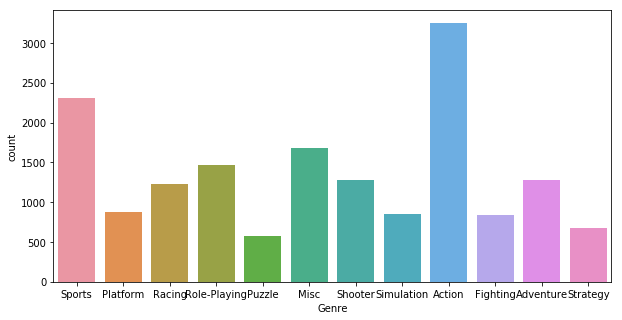

In [43]:
plt.figure(figsize=(10,5))
sns.countplot(clean_df['Genre'])

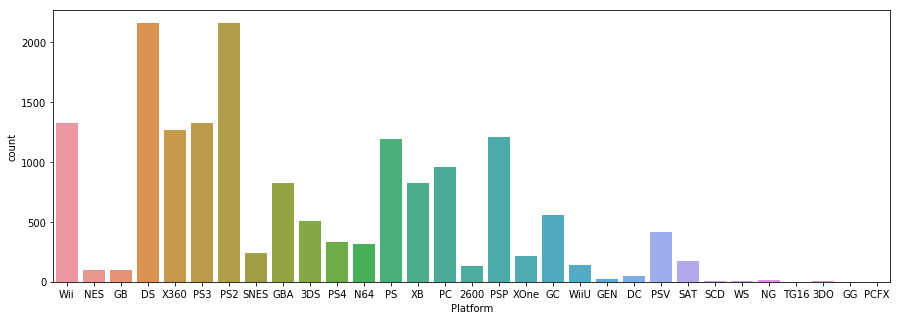

In [44]:
plt.figure(figsize=(15,5))
sns.countplot(df['Platform'])

In [45]:
platGenre = pd.crosstab(df.Platform,df.Genre)
platGenre.head(5)

Genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
Platform,,,,,,,,,,,,
2600,61,2,2,5,9,11,6,0,24,1,12,0
3DO,0,1,0,0,0,1,0,0,0,1,0,0
3DS,182,37,14,53,28,20,11,86,7,30,26,15
DC,3,11,12,0,2,0,6,4,3,1,10,0
DS,343,240,36,393,92,238,67,200,42,285,148,79


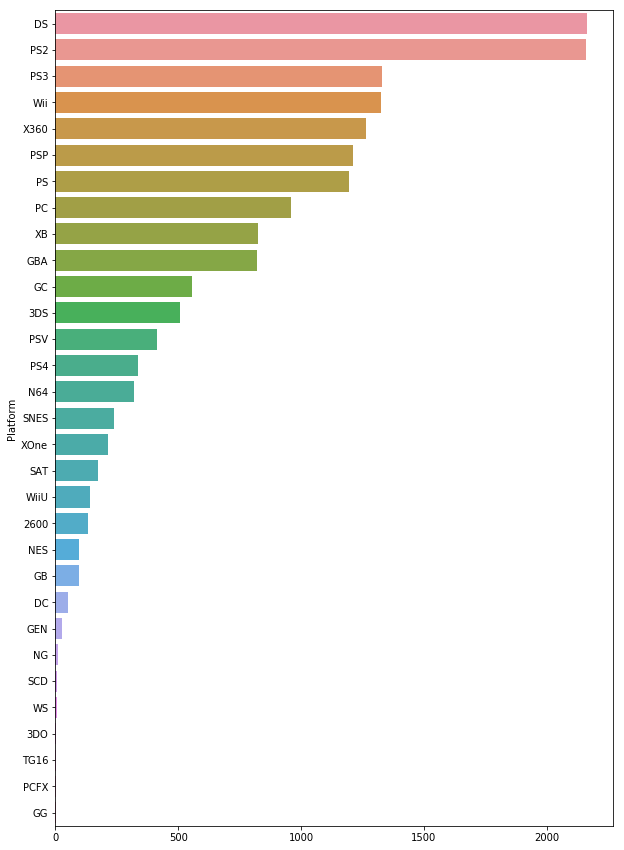

In [46]:
platGenreTotal =platGenre.sum(axis=1).sort_values(ascending = False)
plt.figure(figsize=(10,15))
sns.barplot(x=platGenreTotal.values,y=platGenreTotal.index)

So You can see DS and PS2 have the most games in their platform and now, we can see the detail of genre of game in platform that have more than 1000 games. In the seaborn, it is easy to use heatrmap rather than the stacked bar, so we can use the heatmap to have a try.

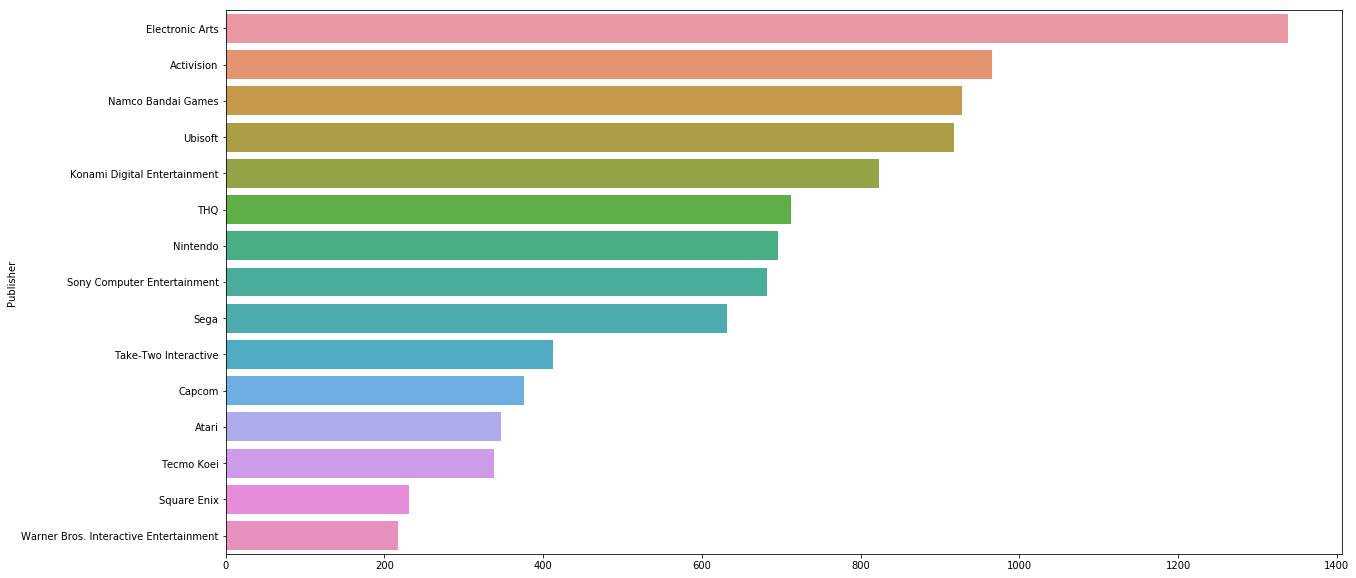

In [47]:
pub=clean_df.groupby('Publisher')['Publisher'].count().sort_values(ascending = False).head(15)
sns.barplot(x=pub.values,y=pub.index)

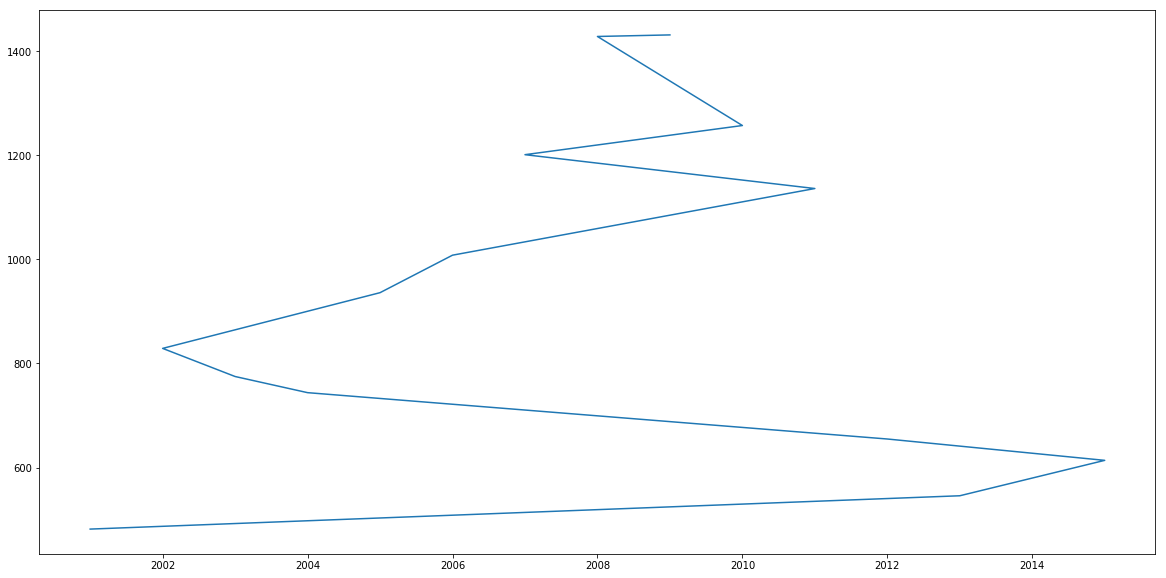

In [49]:
yr=clean_df.groupby('Year')['Year'].count().sort_values(ascending = False).head(15)
plt.plot(yr)

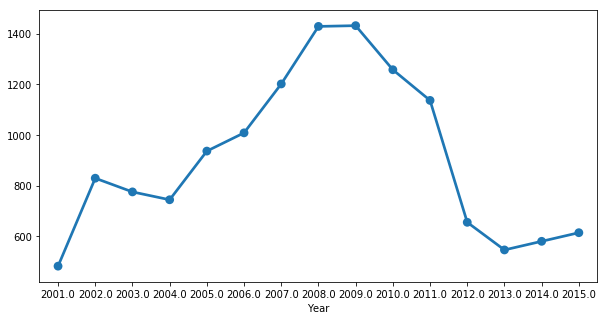

In [50]:
plt.figure(figsize=(10,5))
sns.pointplot(x=yr.index ,y=yr.values)

So it is showing most important year is 2009 based on others year

convert Categorical variable to numerical Variables

In [73]:
from sklearn import model_selection, preprocessing
for c in clean_df.columns:
    if clean_df[c].dtype == 'object':
        lbl = preprocessing.LabelEncoder()
        lbl.fit(list(clean_df[c].values)) 
        df[c] = lbl.transform(list(clean_df[c].values))
        

ValueError: Length of values does not match length of index

AttributeError: module 'seaborn' has no attribute 'plt'

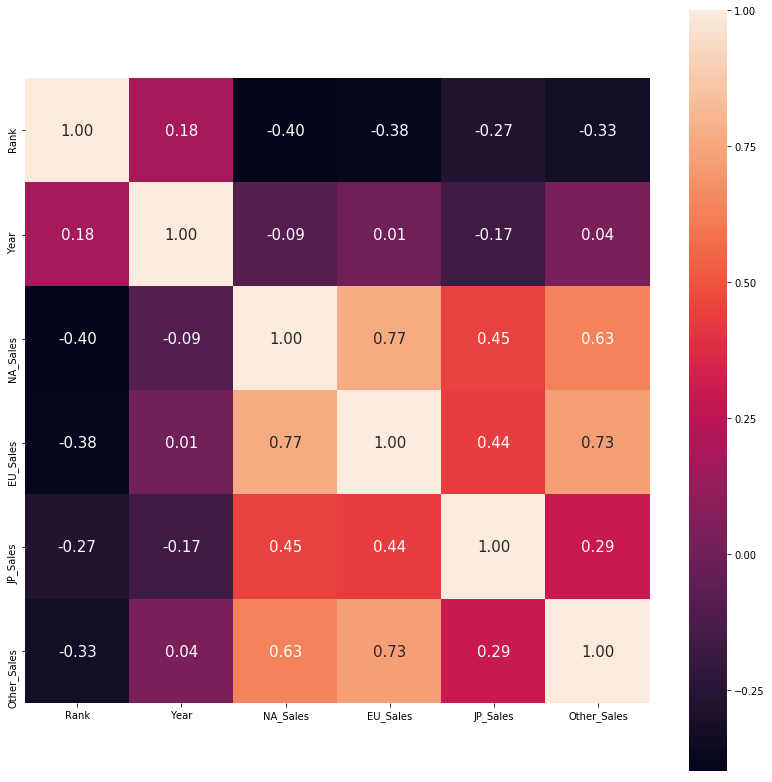

In [74]:
corr=clean_df.corr()
corr = (corr)
plt.figure(figsize=(14,14))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws=

{'size': 15},
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
sns.plt.title('Heatmap of Correlation Matrix')

so all sales are highly correlated with global sales which is very true..Rank is not showing highly correlated with global sales as this is shown in Matrix formation.



C:\Users\Aymen\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


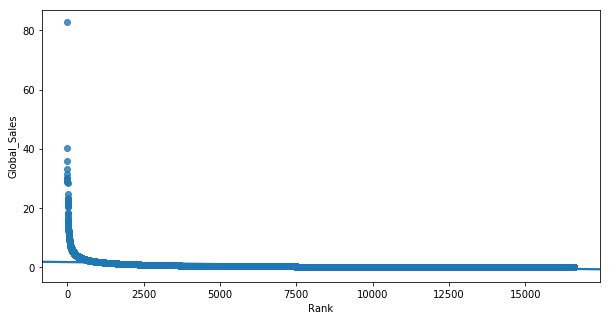

In [53]:
plt.figure(figsize=(10,5))
sns.regplot(x='Rank',y='Global_Sales',data=clean_df)

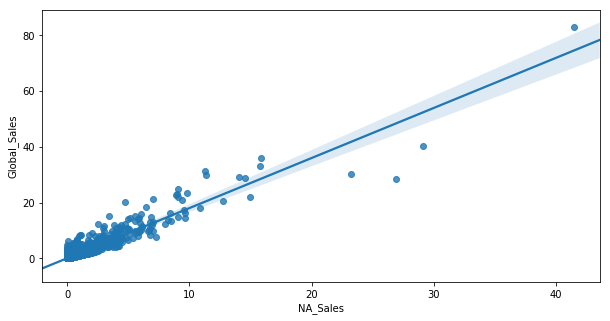

In [55]:
plt.figure(figsize=(10,5))
sns.regplot(x='NA_Sales',y='Global_Sales',data=clean_df)

In [56]:
clean_df.dtypes


Rank              int64
Name             object
Platform         object
Year            float64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object

In [57]:
#Train-Test split
from sklearn.model_selection import train_test_split
label = clean_df.pop('Global_Sales')
data_train, data_test, label_train, label_test = train_test_split(clean_df, label, test_size = 0.2, random_state = 200)

In [58]:
data_train.shape,data_test.shape


((13032, 10), (3259, 10))

#### Start with Extream gradient boosting



In [65]:
#!pip install xgboost

In [66]:
import xgboost as xgb

from sklearn.model_selection import KFold, train_test_split, GridSearchCV

In [67]:
xgb_params = {
    'eta': 0.05,
    'max_depth': 5,
    'subsample': 0.7,
    'colsample_bytree': 0.7,
    'objective': 'reg:linear',
    'eval_metric': 'rmse',
    'silent': 1
}

In [69]:
dtrain = xgb.DMatrix(data_train, label_train)


ValueError: DataFrame.dtypes for data must be int, float or bool.
                Did not expect the data types in fields Name, Platform, Genre, Publisher

In [70]:
lr_data_train=data_train[['NA_Sales','EU_Sales','JP_Sales','Other_Sales']]
lr_data_test=data_test[['NA_Sales','EU_Sales','JP_Sales','Other_Sales']]
lr_label_train=label_train
lr_label_test=label_test

In [71]:
#Linear Regression
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(lr_data_train, lr_label_train)
lr_score_train = lr.score(lr_data_train, lr_label_train)
print("Training score: ",lr_score_train)
lr_score_test = lr.score(lr_data_test, lr_label_test)
print("Testing score: ",lr_score_test)

Training score:  0.9999889271662358
Testing score:  0.9999887509682348


### The accuracy improved to 99% 

In [75]:
y_pre = lr.predict(lr_data_test)


In [76]:
out_lr = pd.DataFrame({'Actual_Global_Sales': lr_label_test, 'Predict_Global_Sales': y_pre,'Diff' :(lr_label_test-y_pre)})
out_lr[['Actual_Global_Sales','Predict_Global_Sales','Diff']].head(5)

,Actual_Global_Sales,Predict_Global_Sales,Diff
9317,0.14,0.130333,0.009667
14835,0.03,0.020339,0.009661
9752,0.12,0.120335,-0.000335
10251,0.11,0.110324,-0.000324
16565,0.01,0.010337,-0.000337


In [77]:
out_lr.shape


(3259, 3)

C:\Users\Aymen\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


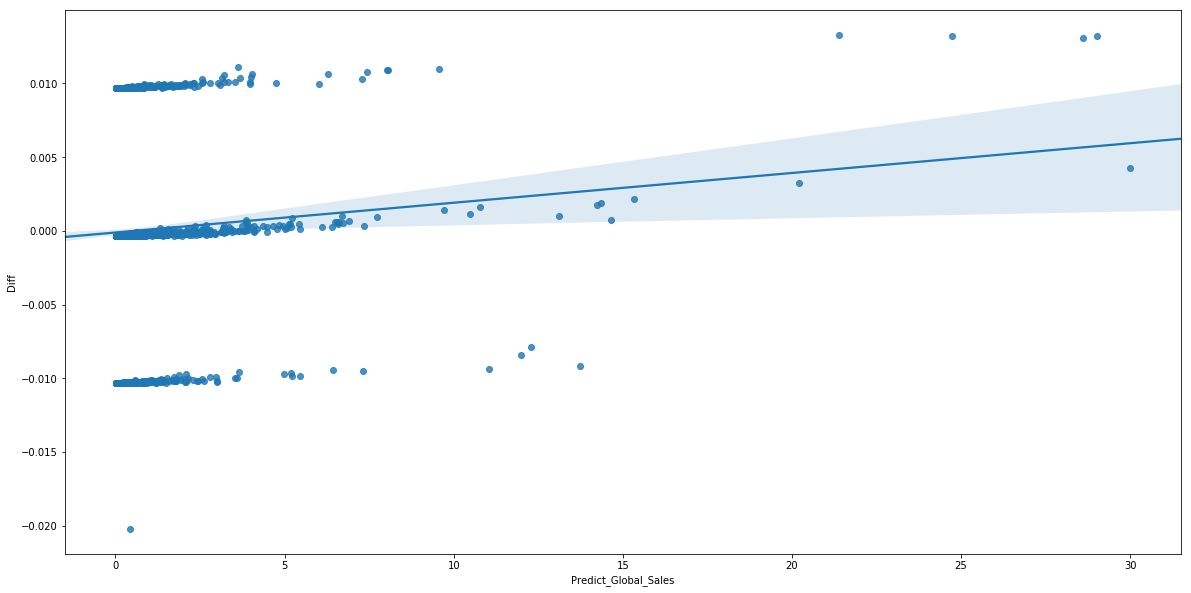

In [78]:
sns.regplot(out_lr['Predict_Global_Sales'],out_lr['Diff'])


In [79]:
#Ensemble XGBOOST & LINEAR REGRESSOR for train data
en_dtest=xgb.DMatrix(data_train)
y_xgb_pred = model.predict(en_dtest)

y_lr_pred = lr.predict(lr_data_train)

Ensemble=pd.DataFrame({'XGBOOST':y_xgb_pred ,'LINEAR_REG':y_lr_pred ,'GLOBAL_SALES':lr_label_train})

ValueError: DataFrame.dtypes for data must be int, float or bool.
                Did not expect the data types in fields Name, Platform, Genre, Publisher

In [80]:
corr=Ensemble.corr()
corr = (corr)
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
sns.plt.title('Heatmap of Correlation Matrix')

NameError: name 'Ensemble' is not defined